# B2.7 Integrals - Infinite Sum
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B2.7.1 Short Introduction

We consider the integral of a dependent function $f(x)$ with respect to its independent variable $x$ and write it as

$$ \int f(x)dx $$

The idea that the integral represents an infinte sum really comes from considering the meaning of 

$$ f(x)dx $$

where $f(x)$ is a function value (a number) obtained by evaluating the function at point $x$ and $dx$ is the **differential** of $x$ (a really small number, whatever that means for now).

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B2.7.2 Meaning of $f(x)dx$

I will try and explain it through a graph, so let us do some Python magic here. As an illustrative example, I am plotting the function $f(x) = x^3$. I am also plotting the point $f_3 = 27$, and sketching in a *stepsize* $\Delta x$ that I for now set as $\Delta x = 1$ (the number is not necessarily important, I just randomly picked $1$). 

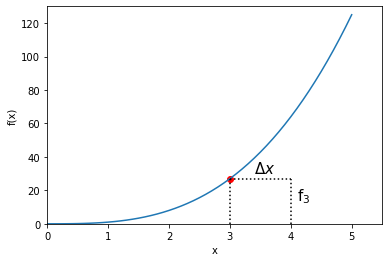

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0,5.1,0.1)
f = x**3

x0 = 3.
f0 = 27.
dx = 1.0

plt.figure()
plt.ylabel('f(x)')
plt.xlabel('x')
ax = plt.gca()
ax.plot(x,f,'-')
ax.set_xlim([0, np.max(x)+0.5])
ax.set_ylim([0, np.max(f)+5])

ax.scatter(x0,f0,color='r')

ax.hlines(f0, x0, x0+dx, colors='k', linestyles='dotted')
ax.vlines(x0, 0, f0, colors='k', linestyles='dotted')
ax.vlines(x0+dx, 0, f0, colors='k', linestyles='dotted')
ax.annotate('$\Delta x$', xy=(3.4, 30), xycoords='data',fontsize=15)
ax.annotate('f$_3$', xy=(4.1, 14), xycoords='data', fontsize=15)


plt.show()

If we consider this sketch above, how would we interpretate $f(x)\Delta x$? Well, as values we have $f_3 = 27$ and $\Delta x = 1$, so we must have $f(x)\Delta x = (27)(1) = 27$ for that specific case. What does that number then represent? It looks like it is the area of the dotted rectangle with base = $\Delta x$ and height = $f(x)$. 

I can make $\Delta x$ smaller, say $\Delta x = 0.25$. 

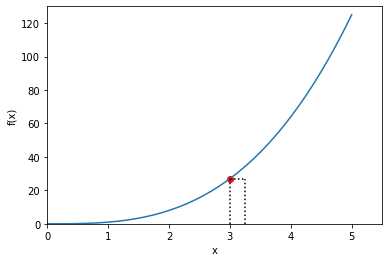

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0,5.1,0.1)
f = x**3

x0 = 3.
f0 = 27.
dx = 0.25

plt.figure()
plt.ylabel('f(x)')
plt.xlabel('x')
ax = plt.gca()
ax.plot(x,f,'-')
ax.set_xlim([0, np.max(x)+0.5])
ax.set_ylim([0, np.max(f)+5])

ax.scatter(x0,f0,color='r')

ax.hlines(f0, x0, x0+dx, colors='k', linestyles='dotted')
ax.vlines(x0, 0, f0, colors='k', linestyles='dotted')
ax.vlines(x0+dx, 0, f0, colors='k', linestyles='dotted')
#ax.annotate('$\Delta x$', xy=(3.4, 30), xycoords='data',fontsize=15)
#ax.annotate('f(3)', xy=(4.1, 14), xycoords='data', fontsize=15)


plt.show()

Now the product is $f(x)\Delta x = (27)(0.25) = 6.25$. The value changed but the conceptual representation did not: **the product $f(x)\Delta x$ represents an approximate area of a section between the graph and the x-axis**. 

We can keep making $\Delta x$ smaller and smaller. However, in Calculus we will often use the concept of letting it go to zero, or have the concept of it being infinitesimal small without being zero: that is, the **difference** $\Delta x$ becomes the **differential** $dx$, and we have $f(x)dx$ instead, but the conceptual meaning is the same:

<div class="alert alert-success">
    
$f(x)dx$ is a measure of the area between a segment (length $dx$) of a function $f(x)$ and the x-axis
</div>

<div class="alert alert-info">
    
The term "area" is now losing its meaning as a spatial area, since we can talk about an area in all kinds of units. For example, consider an acceleration (m/s$^2$) vs time (s) graph, where the area would have unit of m/s. 
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B2.7.3 The Approximate Area Under a Function

With the concept discussed above, we can extend this to consider a bunch of data points of the function. Let us try and see how that looks using the stepsize $\Delta x = 0.25$:

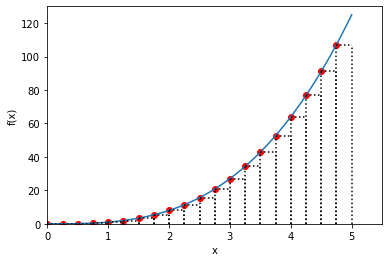

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0,5.1,0.1)
f = x**3

x0 = 0.
f0 = 0.
dx = 0.25

plt.figure()
plt.ylabel('f(x)')
plt.xlabel('x')
ax = plt.gca()
ax.plot(x,f,'-')
ax.set_xlim([0, np.max(x)+0.5])
ax.set_ylim([0, np.max(f)+5])

length = int(np.max(x)/0.25)
for ipoint in range(length):
    ax.scatter(x0,f0,color='r')
    ax.hlines(f0, x0, x0+dx, colors='k', linestyles='dotted')
    ax.vlines(x0, 0, f0, colors='k', linestyles='dotted')
    ax.vlines(x0+dx, 0, f0, colors='k', linestyles='dotted')
    x0 = x0 + dx
    f0 = x0**3


plt.show()

We can probably without too much concern say that **the sum of all rectangular areas approximately represents the total area bounded by the function $f(x)$ and the x-axis** between x = 0 and x = 5. In the language of mathematics, we will write it as

$$ \textrm{Area} \sim \sum\limits_{n=1}^{N} f(x_n)\Delta x $$

where $n$ is the dummy index corresponding to an identified for a single data point and $N$ is the number of data points (or rectangles). 

<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">       
<header>
<h3> Example 1</h3>
    </header>
    
Estimate the area bounded by the function $f(x) = x^3$ between the data $x = 0$ and $x = 4$ using step size of $\Delta x = 1.0$.

**Solution**
    
Using the equation above, we identify $f(x) = x^3$, $\Delta x = 1.0$, $n = [1,2,3,4]$ since we have four data intervals (but 5 data points: $x = [0, 1, 2, 3, 4]$). Inserting into the equation, we get

$$ \textrm{Area} \sim \sum\limits_{n=1}^{N} f(x_n)\Delta x $$

$$ \textrm{Area} \sim f(0)(1 - 0) + f(1)(2 - 1) + f(2)(3 - 2) + f(3)(4 - 3)  $$

$$ \textrm{Area} \sim (0)(1) + (1)(1) + (8)(1) + (27)(1)  $$

$$ \textrm{Area} \sim 36 $$

in whatever units the product $f(x)\Delta x$ is in.
    
We can visualize our example through a plot (I have also added code to let Python spit out the estimated area):
</div>

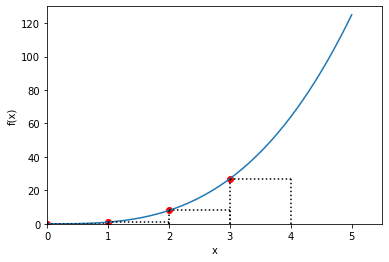

Area = 36.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0,5.1,0.1)
f = x**3

x0 = 0.
f0 = 0.
dx = 1.0

plt.figure()
plt.ylabel('f(x)')
plt.xlabel('x')
ax = plt.gca()
ax.plot(x,f,'-')
ax.set_xlim([0, np.max(x)+0.5])
ax.set_ylim([0, np.max(f)+5])

area = 0.
length = int(4./dx)
for ipoint in range(length):
    
    area = area + f0*dx
    
    ax.scatter(x0,f0,color='r')
    ax.hlines(f0, x0, x0+dx, colors='k', linestyles='dotted')
    ax.vlines(x0, 0, f0, colors='k', linestyles='dotted')
    ax.vlines(x0+dx, 0, f0, colors='k', linestyles='dotted')
    x0 = x0 + dx
    f0 = x0**3

plt.show()
print('Area = '+ str(area))

<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">  
    
Is this area underestimated or overestimated? We can by inspection of the graph see that we are missing portions of the actaul area, and we are therefore underestimating the area. How can we improve our estimate? We can make smaller stepsizes $\Delta x$. Let us try and change the stepsize to $\Delta x = 0.25$

That implies we now have to perform 15 calculations by hand. Not too bad, but I do not really want to do that. Instead, I am going to use the Python script we now have :)
    
</div>

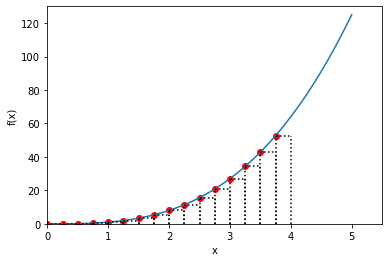

Area = 56.25


In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0,5.1,0.1)
f = x**3

x0 = 0.
f0 = 0.
dx = 0.25

plt.figure()
plt.ylabel('f(x)')
plt.xlabel('x')
ax = plt.gca()
ax.plot(x,f,'-')
ax.set_xlim([0, np.max(x)+0.5])
ax.set_ylim([0, np.max(f)+5])

area = 0.
length = int(4/dx)
for ipoint in range(length):
    
    area = area + f0*dx
    
    ax.scatter(x0,f0,color='r')
    ax.hlines(f0, x0, x0+dx, colors='k', linestyles='dotted')
    ax.vlines(x0, 0, f0, colors='k', linestyles='dotted')
    ax.vlines(x0+dx, 0, f0, colors='k', linestyles='dotted')
    x0 = x0 + dx
    f0 = x0**3

plt.show()
print('Area = '+ str(area))

<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">  
    
We now see that our approximation is better as we are missing less of the regions between the graph and the x-axis. We should feel pretty hot about ourself right now! Can we make it better? Sure, I will increase the stepsize to $\Delta x = 0.1$.

</div>

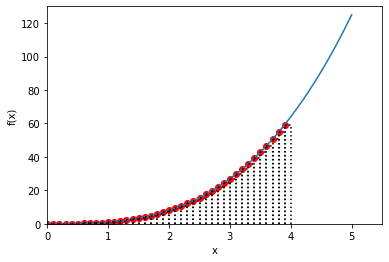

Area = 60.84000000000009


In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0,5.1,0.1)
f = x**3

x0 = 0.
f0 = 0.
dx = 0.1

plt.figure()
plt.ylabel('f(x)')
plt.xlabel('x')
ax = plt.gca()
ax.plot(x,f,'-')
ax.set_xlim([0, np.max(x)+0.5])
ax.set_ylim([0, np.max(f)+5])

area = 0.
length = int(4/dx)
for ipoint in range(length):
    
    area = area + f0*dx
    
    ax.scatter(x0,f0,color='r')
    ax.hlines(f0, x0, x0+dx, colors='k', linestyles='dotted')
    ax.vlines(x0, 0, f0, colors='k', linestyles='dotted')
    ax.vlines(x0+dx, 0, f0, colors='k', linestyles='dotted')
    x0 = x0 + dx
    f0 = x0**3

plt.show()
print('Area = '+ str(area))

<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">  
    
We notice that the area is still changing, but not by as much as before. The first change (36 to 56.25) was a whooping 56%, while this last jump was 8%. Hence, we can now say with confidence that we are within 8% of the actual area! 
</div>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 1</b><br>
    
Consider the function $f(x) = x^4$. Estimate the area between the function and the x-axis between x = 0 and x = 4 as follows:
   
1. Using a step size of $\Delta x = 1$ using the equation above.
2. Confirm your answer by using a computer script.
3. Increase the step size to 0.25 and report the new area as well as the percent change from previous.
4. Increase the step size to 0.1 and report the new area as well as the percent change from previous. 
5. Increase the step size to 0.01 and report the new area as well as the percent change from previous.

</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B2.7.4 Riemann Sum and Numerical Integration

The sum we applied above to estimate the area bounded between the function and the x-axis is known as the **left Riemann sum** and is probably the first introduction to integration you see in calculus. You will then be introduced to the **right Riemann sum** and **middle Riemann sum** before moving on to the integral. These Riemann sums are all examples of **numerical integration** and involves summing over a finite number of steps (or geometric shapes such as rectangles in our example). Some numerical approaches are better than others, in calculus you learn numerical approaches such as **the midpoint rule** and **the trapezoidal rule**. 

Numerical integration is extremely powerful as we can utilize it to evaluate the integral 

* of a function that can not be solved analytically
* of a data set where we have no idea about the function describing the data. This is real life stuff!
* by using computer models. These numerical methods are relatively straightforward to program. The program above is an exmaple of a numerical integration using the left Riemann sum approach.

For a quick overview of, check out the wikipedia page on [Riemann Sums](https://en.wikipedia.org/wiki/Riemann_sum).

We will explore another numerical integration approach in this course, which will allow us to solve a realistic physics problem involving air drag. Often in real life applications, our physics problems involves non-linear components, and we can not solve the problems analytically but will have to use numerical methods instead. Angry birds, here we come!

In fact, if you are programming a video game and using somewhat realisitic physics, you are already doing numerical integration!

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B2.7.5 The Definite Integral

Ok, we are now ready to take the step into the integral as approached from a conceptual point of view. Above, we argued that the area bounded between the graph and the x-axis could be approximated by the sum (the left Riemann sum):

$$ \textrm{Area} \sim \sum\limits_{n=0}^{N} f(x_n)\Delta x $$

The smaller stepsize $\Delta x$ the better the approximation. If we take an infinite number of steps, then we have $\Delta x \rightarrow dx$ and $N \rightarrow \infty$ and the area becomes exact:

$$ \textrm{Area} = \sum\limits_{n=0}^{\infty} f(x)dx $$

We call this area for the **definite integral** of $f(x)$ with respect to $x$ over the interval $x = [a,b]$ and write it as

$$\int_{a}^{b} f(x)dx$$

where $a$ and $b$ represents the **limits of the integration**.

Below is a code I copied and pasted from [MatPlotLib Website of Incredible Examples With Source Code](https://matplotlib.org/3.1.1/gallery/showcase/integral.html) that perfectly illustrates this idea.

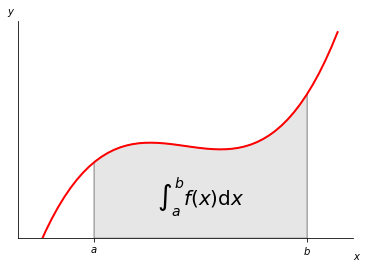

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## B2.7.6 Final Notes

The objective of this note was simply to get the conceptual idea that the integral can be related to the area bounded between a function and the independent variable axis. This lead to the concept of the **definite integral**. We will see in the following note how we actually calculate it in an analytic way (you have seen here how we can do it in a numerical way). 

A few notes to consider before we move on:

* The area is no longer our normal spatial area. For example, if the function is below the x-axis, the area will be negative, which makes absolutely no sense for a normal spatial area.
* The area is calculated over a range of x-values and is specified through the *limits of the integration*.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">